In [4]:
pip install quantstats

Note: you may need to restart the kernel to use updated packages.


### Packages nécessaire à ce script

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import quantstats as qs

### import des données de rendements après application du modèle sur les données tests(The_bot&test)

In [7]:

# Charger le DataFrame depuis le fichier CSV exporté
df = pd.read_csv('/kaggle/input/crypto/df (1).csv')

# Afficher les premières lignes pour vérifier que tout est en ordre
print(df.head())


             timestamp     open     high      low    close     volume  \
0  2024-01-01 16:50:00  2311.61  2313.35  2310.86  2311.36   440.1587   
1  2024-01-01 16:55:00  2311.36  2311.39  2309.40  2309.89   533.8544   
2  2024-01-01 17:00:00  2309.89  2312.09  2306.48  2309.53  1362.1103   
3  2024-01-01 17:05:00  2309.53  2312.34  2309.53  2311.84   416.0986   
4  2024-01-01 17:10:00  2311.83  2316.51  2311.83  2315.17   998.0475   

         rsi      macd  macd_signal       atr  ...  Stratégie2  \
0  45.948104 -0.319647    -0.239313  4.227143  ...        5000   
1  43.401207 -0.422478    -0.277282  3.916429  ...        5000   
2  42.109228 -0.517029    -0.326620  4.112143  ...        5000   
3  44.870875 -0.439767    -0.349771  3.935000  ...        5000   
4  54.358270 -0.165243    -0.312188  4.046429  ...        5000   

   Stratégie2_Frais  Stratégie1  Stratégie1_Frais  MM_courte  MM_longue  \
0              5000     4997.64        4996.48314   2311.896        NaN   
1             

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


### Organisation du dataframe (Passage en journalier pour quantstats et sinon le code met 4h à faire un graph)

In [9]:
# Convertir la colonne 'timestamp' en datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extraire la date de chaque timestamp
df['date'] = df['timestamp'].dt.date

# Regrouper les résultats par jour en prenant la dernière valeur de chaque stratégie
grouped_df = df.groupby('date').last()

# Sélectionner les colonnes des différentes stratégies pour les afficher
strategies_columns = ['Stratégie1', 'Strat_2', 'BH', 'Stratégie1_Frais', 'BH_Frais', 'Strat_2_Frais']
grouped_strategies_df = grouped_df[strategies_columns]

# Afficher les résultats regroupés par jour pour les différentes stratégies
print(grouped_strategies_df)

            Stratégie1  Strat_2       BH  Stratégie1_Frais    BH_Frais  \
date                                                                     
2024-01-01     5038.32  5000.00  5040.68       5037.163140  5039.52432   
2024-01-02     5070.50  5000.00  5043.98       5068.151030  5042.82432   
2024-01-03     5052.17  4850.87  4898.36       5042.715665  4897.20432   
2024-01-04     5077.33  4842.97  4955.75       5062.322740  4954.59432   
2024-01-05     5049.87  4830.09  4957.42       5023.595415  4956.26432   
...                ...      ...      ...               ...         ...   
2025-02-22     7195.42  6186.05  5451.86       4080.648210  5450.70432   
2025-02-23     7204.08  6242.35  5508.33       4078.152055  5507.17432   
2025-02-24     7182.87  5936.18  5202.16       4055.542815  5201.00432   
2025-02-25     7235.40  5844.87  5184.34       4106.851230  5183.18432   
2025-02-26     7236.01  5844.87  5184.95       4107.461230  5183.79432   

            Strat_2_Frais  
date     

### plot de l'évolution du Capital (5000€ en base) selon les stratégies)

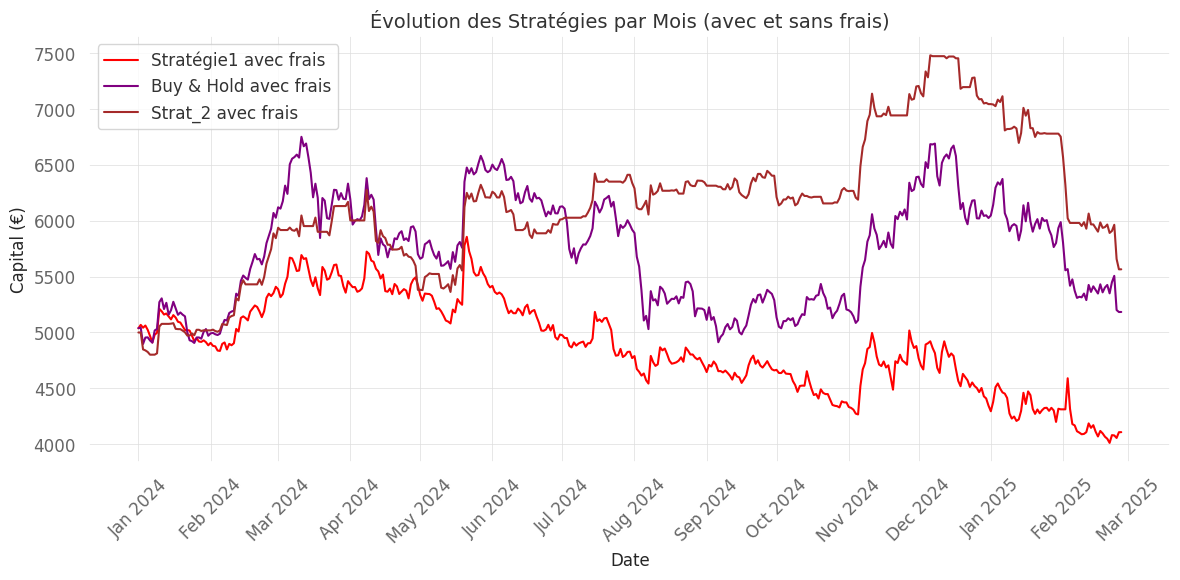

In [12]:
# S'assurer que l'index est de type datetime si ce n'est pas déjà fait
grouped_strategies_df.index = pd.to_datetime(grouped_strategies_df.index)

# Créer une figure pour le graphique
plt.figure(figsize=(12, 6))

# Tracer les courbes pour chaque stratégie
plt.plot(grouped_strategies_df.index, grouped_strategies_df['Stratégie1_Frais'], label='Stratégie1 avec frais', color='red')
plt.plot(grouped_strategies_df.index, grouped_strategies_df['BH_Frais'], label='Buy & Hold avec frais', color='purple')
plt.plot(grouped_strategies_df.index, grouped_strategies_df['Strat_2_Frais'], label='Strat_2 avec frais', color='brown')

# Format des axes x (par mois et année)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Placer une étiquette tous les mois
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format: Mois Année (Jan 2024)
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator())  # Ajouter des sous-divisions pour les semaines

# Rotation des labels pour éviter les chevauchements
plt.xticks(rotation=45)

# Ajouter les titres et légende
plt.title('Évolution des Stratégies par Mois (avec et sans frais)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Capital (€)', fontsize=12)
plt.legend(loc='upper left')

# Ajouter une grille pour mieux voir les tendances
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()


### Calcul des renta journalière

In [13]:
grouped_strategies_df['Rentabilité_Stratégie1_Frais'] = grouped_strategies_df['Stratégie1_Frais'].pct_change()
grouped_strategies_df['Rentabilité_BH_Frais'] = grouped_strategies_df['BH_Frais'].pct_change()
grouped_strategies_df['Rentabilité_Strat_2_Frais'] = grouped_strategies_df['Strat_2_Frais'].pct_change()

# Affichage des résultats (optionnel)
print(grouped_strategies_df[[
                             'Rentabilité_Stratégie1_Frais', 'Rentabilité_BH_Frais', 'Rentabilité_Strat_2_Frais']].head())


            Rentabilité_Stratégie1_Frais  Rentabilité_BH_Frais  \
date                                                             
2024-01-01                           NaN                   NaN   
2024-01-02                      0.006152              0.000655   
2024-01-03                     -0.005019             -0.028877   
2024-01-04                      0.003888              0.011719   
2024-01-05                     -0.007650              0.000337   

            Rentabilité_Strat_2_Frais  
date                                   
2024-01-01                        NaN  
2024-01-02                   0.000000  
2024-01-03                  -0.030285  
2024-01-04                  -0.001864  
2024-01-05                  -0.002894  


<ipython-input-13-4a4788232a8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_strategies_df['Rentabilité_Stratégie1_Frais'] = grouped_strategies_df['Stratégie1_Frais'].pct_change()
<ipython-input-13-4a4788232a8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_strategies_df['Rentabilité_BH_Frais'] = grouped_strategies_df['BH_Frais'].pct_change()
<ipython-input-13-4a4788232a8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

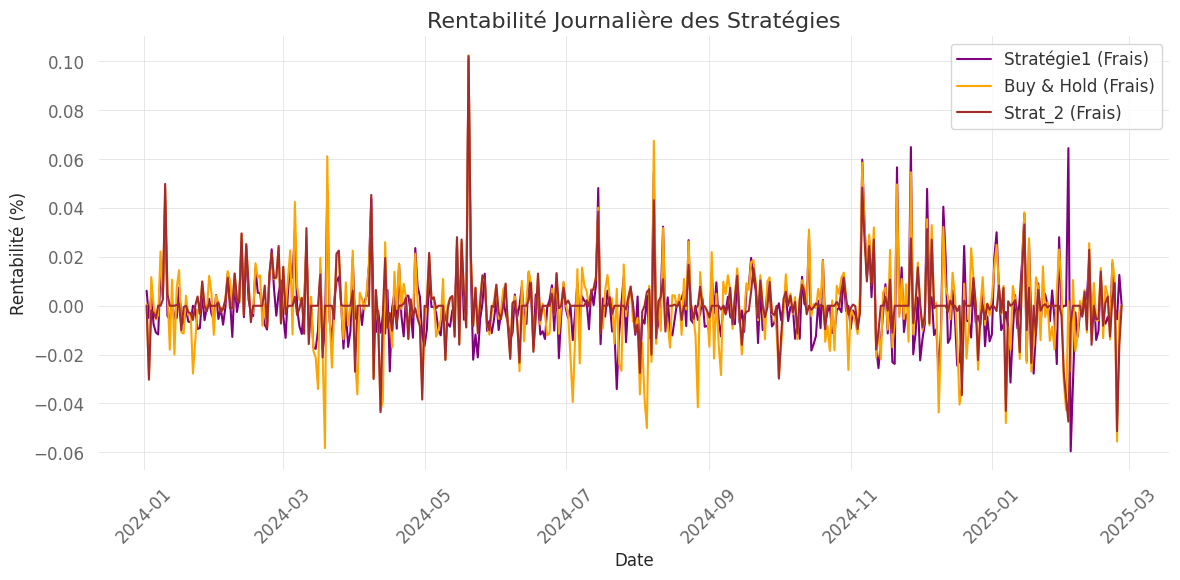

In [14]:

# Création du graphique
plt.figure(figsize=(12, 6))

# Tracé des courbes de rentabilité journalière
plt.plot(grouped_strategies_df.index, grouped_strategies_df['Rentabilité_Stratégie1_Frais'], label='Stratégie1 (Frais)', color='purple')
plt.plot(grouped_strategies_df.index, grouped_strategies_df['Rentabilité_BH_Frais'], label='Buy & Hold (Frais)', color='orange')
plt.plot(grouped_strategies_df.index, grouped_strategies_df['Rentabilité_Strat_2_Frais'], label='Strat_2 (Frais)', color='brown')

# Titres et légende
plt.title('Rentabilité Journalière des Stratégies', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rentabilité (%)', fontsize=12)
plt.legend()
plt.grid(True)

# Rotation de l'axe des x pour mieux visualiser les dates
plt.xticks(rotation=45)

# Affichage du graphique
plt.tight_layout()
plt.show()


Rapport Quanstat

In [18]:
pip install quantstats


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Comparaison Stratégie 2 et bench - Certains graphique ne s'affichent pas (idk la raison)

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2024-01-03   2024-01-03
End Period                 2025-02-26   2025-02-26
Risk-Free Rate             0.0%         0.0%
Time in Market             72.0%        100.0%

Cumulative Return          11.31%       2.8%
CAGR﹪                     6.64%        1.67%

Sharpe                     0.42         0.2
Prob. Sharpe Ratio         70.75%       60.2%
Smart Sharpe               0.41         0.2
Sortino                    0.65         0.29
Smart Sortino              0.64         0.29
Sortino/√2                 0.46         0.21
Smart Sortino/√2           0.45         0.2
Omega                      1.04         1.04

Max Drawdown               -25.61%      -27.24%
Longest DD Days            82           352
Volatility (ann.)          20.26%       28.59%
R^2                        0.54         0.54
Information Ratio          -0.01        -0.01
Calmar                   

None

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2024-03-12,2024-09-06,2025-02-26,352,-27.243669,-25.897902
2,2024-01-12,2024-01-25,2024-02-11,31,-7.527480,-7.218743
3,2024-02-21,2024-02-23,2024-02-24,4,-1.623382,-0.822651
4,2024-03-05,2024-03-05,2024-03-05,1,-1.173510,NaN
5,2024-01-06,2024-01-07,2024-01-07,2,-0.955558,-0.564942


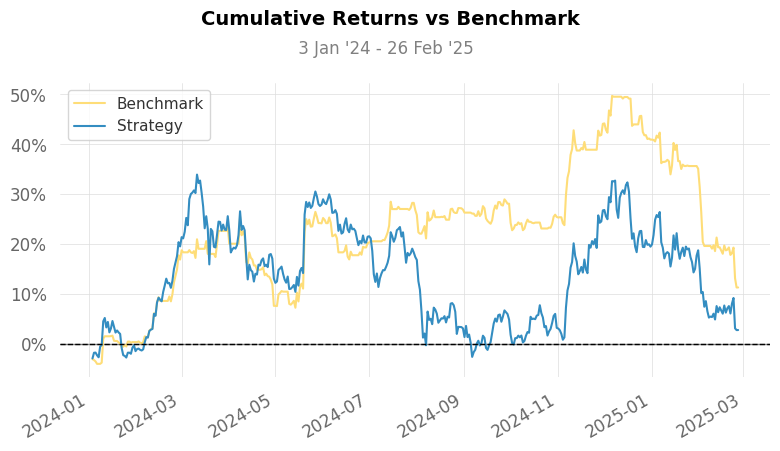

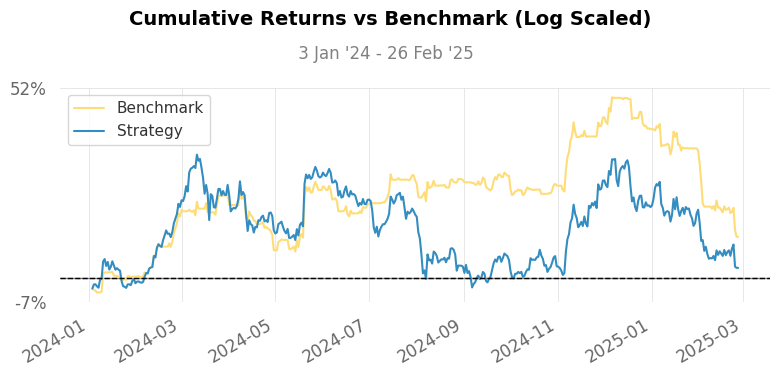

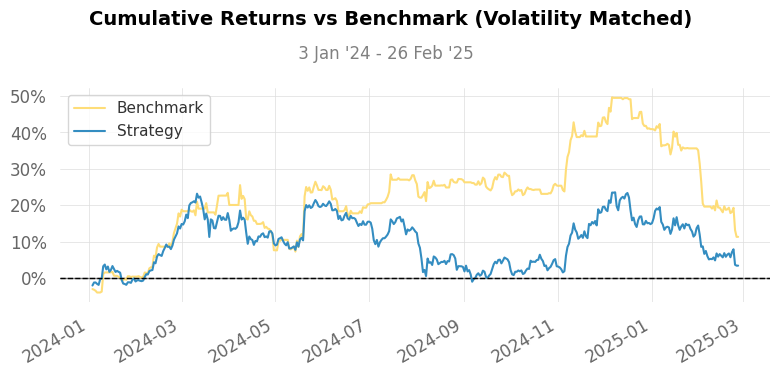

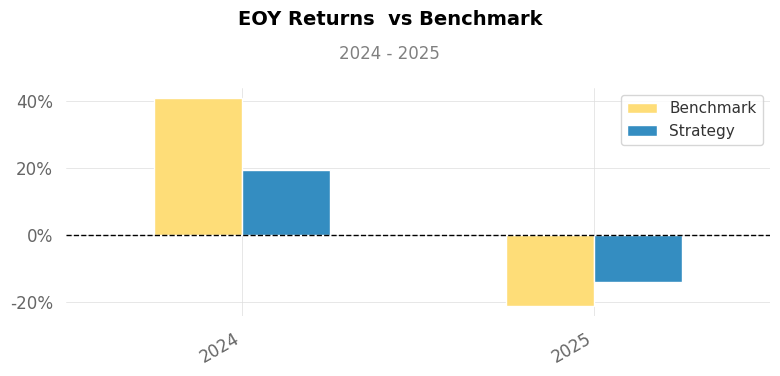

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

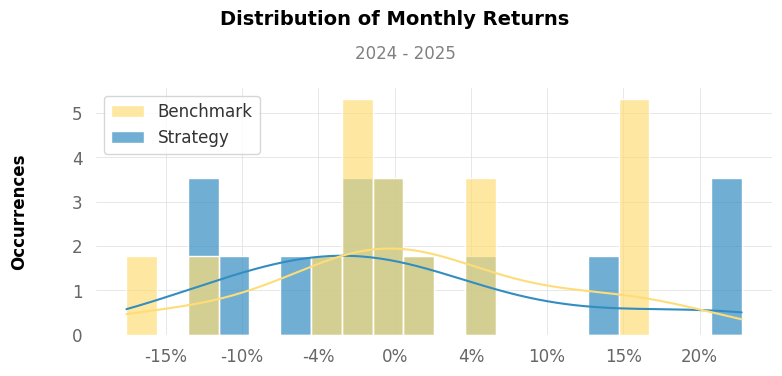

/usr/local/lib/python3.10/dist-packages/quantstats/_plotting/core.py:294: FutureWarning: Passing additional kwargs to DatetimeIndexResampler.sum has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  returns = returns.last() if compound is True else returns.sum(axis=0)


UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [15]:
qs.reports.full(grouped_strategies_df["Rentabilité_BH_Frais"], grouped_strategies_df["Rentabilité_Strat_2_Frais"])

# Comparaison Stratégie 1 et bench

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2024-01-03   2024-01-03
End Period                 2025-02-26   2025-02-26
Risk-Free Rate             0.0%         0.0%
Time in Market             99.0%        100.0%

Cumulative Return          -18.96%      2.8%
CAGR﹪                     -11.85%      1.67%

Sharpe                     -0.4         0.2
Prob. Sharpe Ratio         30.75%       60.2%
Smart Sharpe               -0.39        0.2
Sortino                    -0.68        0.29
Smart Sortino              -0.67        0.29
Sortino/√2                 -0.48        0.21
Smart Sortino/√2           -0.48        0.2
Omega                      1.04         1.04

Max Drawdown               -31.51%      -27.24%
Longest DD Days            281          352
Volatility (ann.)          24.31%       28.59%
R^2                        0.49         0.49
Information Ratio          0.05         0.05
Calmar                    

None

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2024-03-12,2024-09-06,2025-02-26,352,-27.243669,-25.897902
2,2024-01-12,2024-01-25,2024-02-11,31,-7.527480,-7.218743
3,2024-02-21,2024-02-23,2024-02-24,4,-1.623382,-0.822651
4,2024-03-05,2024-03-05,2024-03-05,1,-1.173510,NaN
5,2024-01-06,2024-01-07,2024-01-07,2,-0.955558,-0.564942


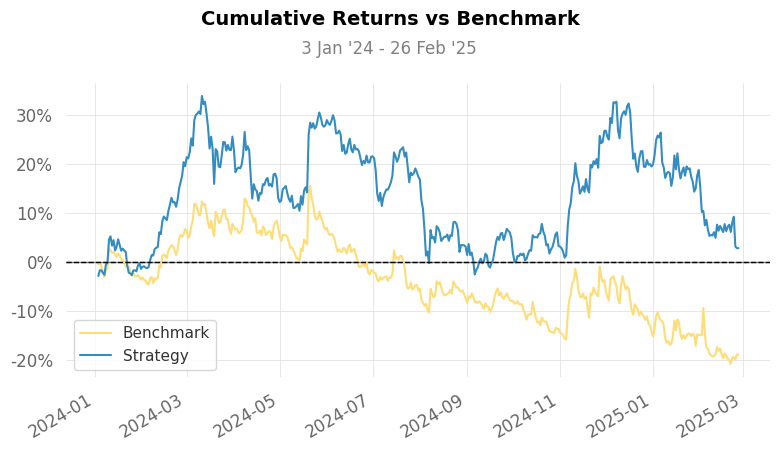

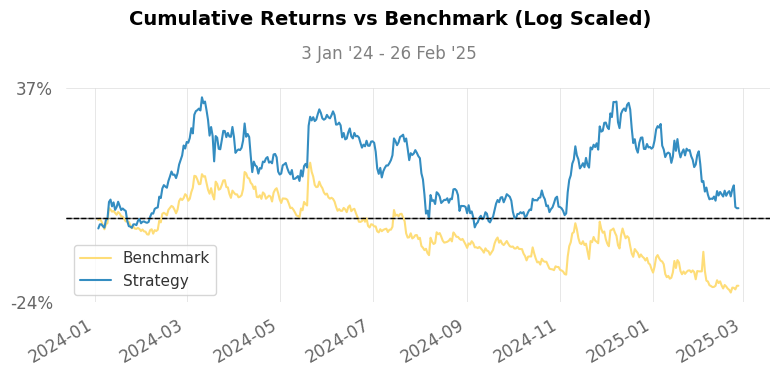

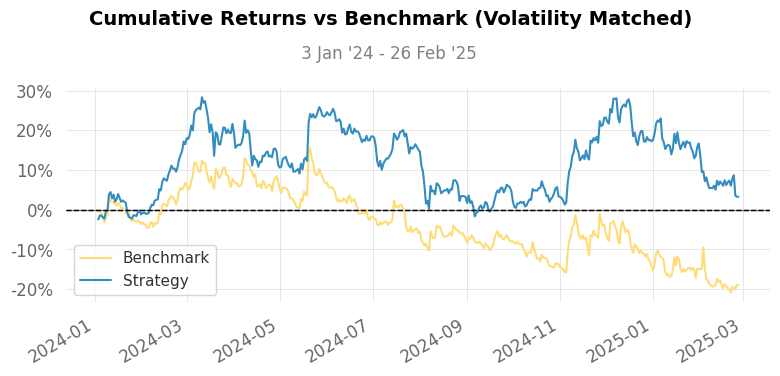

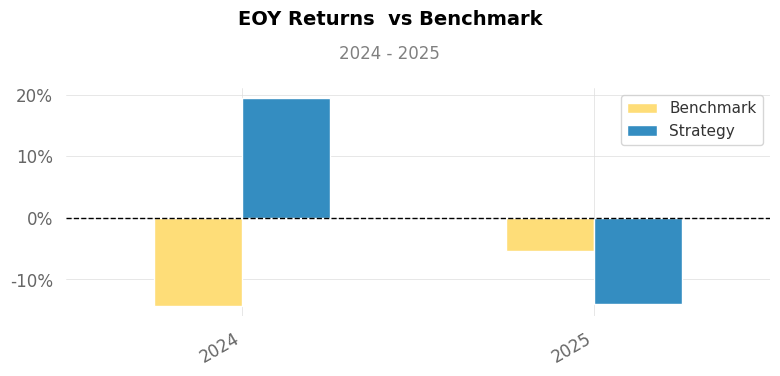

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

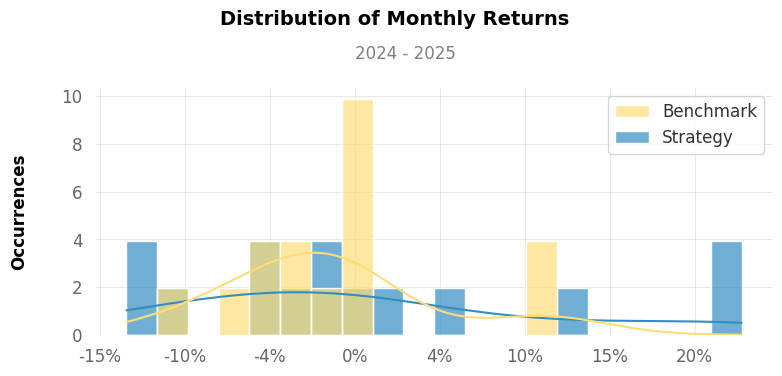

/usr/local/lib/python3.10/dist-packages/quantstats/_plotting/core.py:294: FutureWarning: Passing additional kwargs to DatetimeIndexResampler.sum has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  returns = returns.last() if compound is True else returns.sum(axis=0)


UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [16]:
qs.reports.full(grouped_strategies_df["Rentabilité_BH_Frais"], grouped_strategies_df["Rentabilité_Stratégie1_Frais"])